In [2]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
import os
import math

c:\Users\nuvoone\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "mmoreaux/environmental-sound-classification-50",
    "./"
)

In [3]:
from scipy.io import wavfile
sample_rate, data = wavfile.read('./1-100032-A-0.wav')

In [4]:
os.path.getsize('./1-100032-A-0.wav')

441044

In [5]:
os.path.getsize('./1-100032-A-0.mp3')

25257

In [6]:
temp = data[(int) (44100 * 2.34):(int) (44100 * 2.36)]
temp

array([  -625,   -823,  -2051,  -2590,   -905,   1540,   2591,   2627,
         3534,   5385,   6337,   6030,   6047,   6773,   7047,   6830,
         7201,   8711,  10765,  11762,  11080,  10040,   9817,   9782,
         8454,   5753,   2913,    170,  -3033,  -6113,  -8750, -11981,
       -15714, -18784, -20828, -21903, -22400, -22624, -21575, -18593,
       -15110, -12204,  -9154,  -5268,   -330,   5254,   9907,  12877,
        15426,  17916,  18677,  17201,  14678,  11465,   7118,   1961,
        -2860,  -6212,  -7716,  -7991,  -7556,  -6078,  -3594,   -686,
         2818,   7062,  10700,  12716,  14255,  16405,  18164,  17800,
        15078,  11819,   9805,   8419,   6004,   2758,     59,  -1783,
        -3262,  -4673,  -6042,  -7218,  -8119,  -8817,  -9227,  -9363,
        -9562,  -9947, -10677, -11909, -12894, -13439, -15051, -17896,
       -19900, -20286, -19979, -19023, -16769, -13284,  -8903,  -3440,
         3195,  10229,  16622,  21343,  23430,  23490,  22994,  21304,
      

In [7]:
temp[0]

np.int16(-625)

In [8]:
length = temp.shape[0] / sample_rate

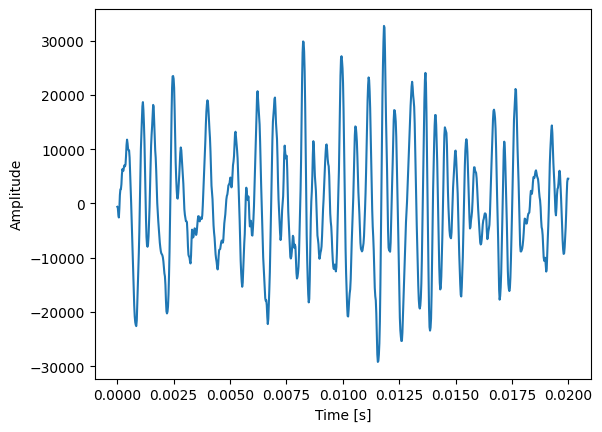

In [9]:
import matplotlib.pyplot as plt
import numpy as np
time = np.linspace(0., length, temp.shape[0])
plt.plot(time, temp)
# plt.plot(time, data[:, 1], label="Right channel")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

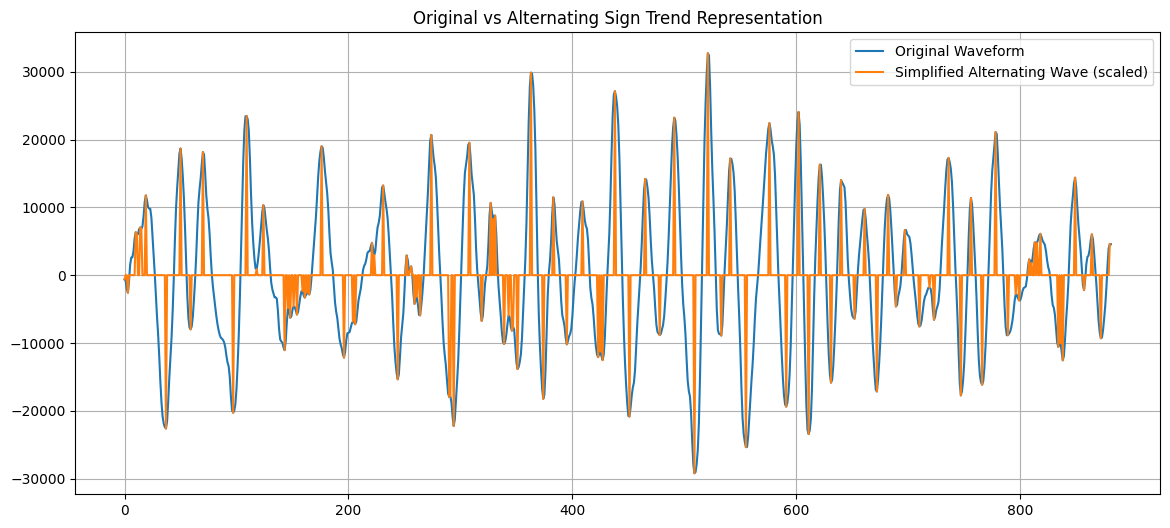

In [10]:
# Step 1: Finding Notable Peaks of the Sinusoidal Graph
# FOR VISUALIZATION (INCOMPLETE)

diffs = np.diff(temp)
mod_temp = []
pos = True

for idx in range(len(diffs)):
    if diffs[idx] < 0 and pos:
        mod_temp.append(temp[idx])
        pos = False
    elif diffs[idx] > 0 and not pos:
        mod_temp.append(temp[idx])
        pos = True
    else:
        mod_temp.append(0) # Maybe put a char header and follow it with the number of zeros that should be in place

# mod_temp = np.array(mod_temp)

plt.figure(figsize=(14, 6))
plt.plot(temp, label='Original Waveform')
plt.plot(mod_temp, label='Simplified Alternating Wave (scaled)')
plt.legend()
plt.title('Original vs Alternating Sign Trend Representation')
plt.grid(True)
plt.show()

In [11]:
def compress_zeros(data):
    result = []
    zero_count = 0

    for value in data:
        if value == 0:
            zero_count += 1
        else:
            if zero_count > 0:
                result.extend(['a', zero_count])
                zero_count = 0
            result.append(value)

    if zero_count > 0:
        result.extend(['a', zero_count])

    return result

In [12]:
mod3_temp = compress_zeros(mod_temp)

In [13]:
mod3_temp

[np.int16(-625),
 'a',
 2,
 np.int16(-2590),
 'a',
 6,
 np.int16(6337),
 np.int16(6030),
 'a',
 2,
 np.int16(7047),
 np.int16(6830),
 'a',
 3,
 np.int16(11762),
 'a',
 17,
 np.int16(-22624),
 'a',
 12,
 np.int16(18677),
 'a',
 8,
 np.int16(-7991),
 'a',
 10,
 np.int16(18164),
 'a',
 26,
 np.int16(-20286),
 'a',
 11,
 np.int16(23490),
 'a',
 8,
 np.int16(882),
 'a',
 5,
 np.int16(10319),
 'a',
 18,
 np.int16(-11064),
 'a',
 2,
 np.int16(-4838),
 'a',
 1,
 np.int16(-6283),
 'a',
 2,
 np.int16(-4595),
 'a',
 2,
 np.int16(-5810),
 'a',
 4,
 np.int16(-2352),
 'a',
 1,
 np.int16(-3312),
 'a',
 1,
 np.int16(-2587),
 'a',
 1,
 np.int16(-2845),
 'a',
 10,
 np.int16(19012),
 'a',
 19,
 np.int16(-12166),
 'a',
 7,
 np.int16(-6845),
 'a',
 1,
 np.int16(-7240),
 'a',
 14,
 np.int16(4769),
 'a',
 1,
 np.int16(2965),
 'a',
 7,
 np.int16(13222),
 'a',
 12,
 np.int16(-15364),
 'a',
 7,
 np.int16(2901),
 'a',
 2,
 np.int16(643),
 np.int16(1297),
 'a',
 2,
 np.int16(-4237),
 'a',
 1,
 np.int16(-3197),
 '

In [14]:
len(mod3_temp)

309

In [15]:
bytecnt = 0

for j in range(len(mod3_temp)):
    if mod3_temp[j] == 'a':
        bytecnt += 1
    else:
        bytecnt += 4

bytecnt

933

##### Audio Chunk Compression: Array 933 bytes

In [16]:
new_diffs = np.diff(data)
new_mod_temp = []
new_pos = True

for idx in range(len(new_diffs)):
    if new_diffs[idx] < 0 and new_pos:
        new_mod_temp.append(data[idx])
        new_pos = False
    elif new_diffs[idx] > 0 and not new_pos:
        new_mod_temp.append(data[idx])
        new_pos = True
    else:
        new_mod_temp.append(0)

In [17]:
new_mod2_temp = compress_zeros(new_mod_temp)
new_mod2_temp

['a',
 98258,
 np.int16(-1),
 'a',
 9,
 np.int16(-1),
 'a',
 17,
 np.int16(-1),
 'a',
 4,
 np.int16(-1),
 'a',
 12,
 np.int16(-1),
 'a',
 2,
 np.int16(1),
 'a',
 4,
 np.int16(-1),
 'a',
 1,
 np.int16(1),
 'a',
 4,
 np.int16(-1),
 'a',
 2,
 np.int16(1),
 'a',
 3,
 np.int16(-1),
 'a',
 2,
 np.int16(-1),
 np.int16(1),
 'a',
 5,
 np.int16(1),
 'a',
 8,
 np.int16(-1),
 'a',
 2,
 np.int16(-1),
 'a',
 2,
 np.int16(-1),
 'a',
 3,
 np.int16(1),
 'a',
 2,
 np.int16(1),
 'a',
 1,
 np.int16(-1),
 'a',
 1,
 np.int16(-1),
 'a',
 6,
 np.int16(1),
 'a',
 4,
 np.int16(1),
 'a',
 1,
 np.int16(-1),
 'a',
 5,
 np.int16(-1),
 'a',
 8,
 np.int16(1),
 'a',
 1,
 np.int16(-1),
 'a',
 16,
 np.int16(1),
 'a',
 10,
 np.int16(1),
 'a',
 1,
 np.int16(-1),
 'a',
 3,
 np.int16(1),
 np.int16(-1),
 'a',
 1,
 np.int16(1),
 'a',
 4,
 np.int16(1),
 'a',
 3,
 np.int16(-1),
 'a',
 1,
 np.int16(1),
 'a',
 1,
 np.int16(-1),
 'a',
 3,
 np.int16(1),
 'a',
 3,
 np.int16(-1),
 np.int16(1),
 'a',
 1,
 np.int16(-1),
 'a',
 8,
 np.i

In [18]:
new_bytecnt = 0

for k in range(len(new_mod2_temp)):
    if new_mod2_temp[k] == 'a':
        new_bytecnt += 1
    else:
        new_bytecnt += 4

new_bytecnt

19990

#### Full Audio Quantization: WAV 441044 Bytes (441kB) -> MP3 25257 Bytes (25kB)
####                                                   -> Array 19990 Bytes (19kB)

#### Determining Resampling Accuracy (First with Audio Chunk for Visual Judgements)

In [19]:
# For testing reasons, we will not retranslate new_mod2_temp to new_mod_temp
# Check for wrong interpolations over positive -> negative or negative -> positive values

def interpolate_array(arr):
    arr = np.array(arr, dtype=float)
    n = len(arr)

    # Find indices where values are non-zero
    nonzero_indices = np.where(arr != 0)[0]

    # If no nonzero values, return the original array
    if len(nonzero_indices) == 0:
        return arr.tolist()

    # Interpolate between nonzero values
    for i in range(len(nonzero_indices) - 1):
        start_idx = nonzero_indices[i]
        end_idx = nonzero_indices[i + 1]
        start_val = arr[start_idx]
        end_val = arr[end_idx]
        step = (end_val - start_val) / (end_idx - start_idx)
        for j in range(start_idx + 1, end_idx):
            arr[j] = start_val + step * (j - start_idx)

    return arr.astype(int).tolist()

In [20]:
resampled_mod_temp = interpolate_array(mod_temp)
resampled_mod_temp

[-625,
 -1280,
 -1935,
 -2590,
 -1314,
 -39,
 1235,
 2511,
 3786,
 5061,
 6337,
 6030,
 6369,
 6708,
 7047,
 6830,
 8063,
 9296,
 10529,
 11762,
 9851,
 7941,
 6031,
 4120,
 2210,
 300,
 -1610,
 -3520,
 -5431,
 -7341,
 -9251,
 -11162,
 -13072,
 -14982,
 -16893,
 -18803,
 -20713,
 -22624,
 -19447,
 -16270,
 -13093,
 -9916,
 -6739,
 -3562,
 -385,
 2792,
 5969,
 9146,
 12323,
 15500,
 18677,
 15713,
 12750,
 9787,
 6824,
 3861,
 898,
 -2064,
 -5027,
 -7991,
 -5613,
 -3235,
 -857,
 1519,
 3897,
 6275,
 8653,
 11030,
 13408,
 15786,
 18164,
 16739,
 15315,
 13891,
 12467,
 11043,
 9619,
 8195,
 6771,
 5347,
 3923,
 2499,
 1075,
 -348,
 -1773,
 -3197,
 -4621,
 -6045,
 -7469,
 -8893,
 -10317,
 -11741,
 -13165,
 -14589,
 -16013,
 -17437,
 -18861,
 -20286,
 -16638,
 -12990,
 -9342,
 -5694,
 -2046,
 1602,
 5250,
 8898,
 12546,
 16194,
 19842,
 23490,
 20978,
 18466,
 15954,
 13442,
 10930,
 8418,
 5906,
 3394,
 882,
 2454,
 4027,
 5600,
 7173,
 8746,
 10319,
 9193,
 8068,
 6942,
 5817,
 4691,
 3

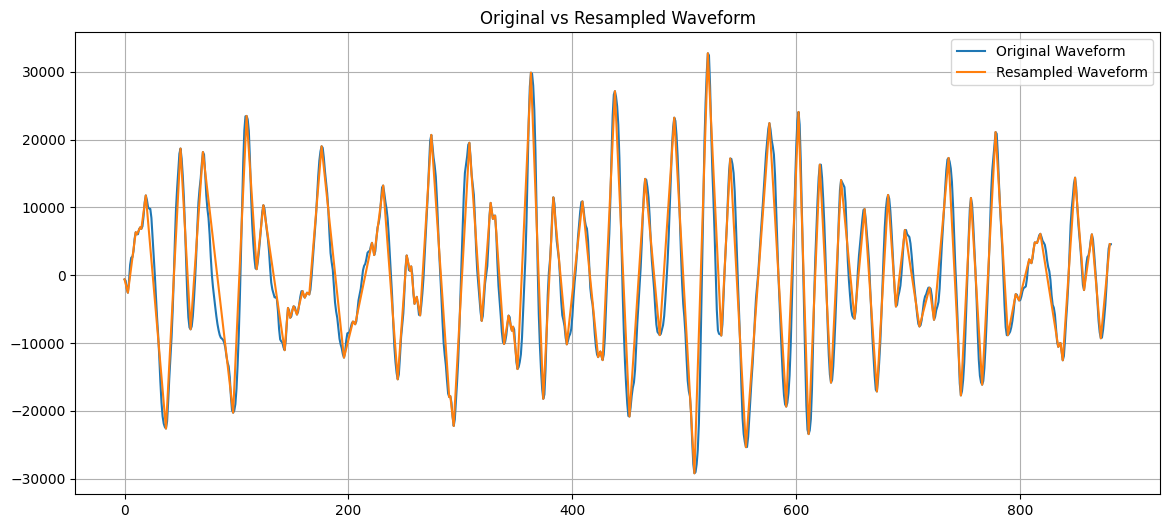

In [21]:
plt.figure(figsize=(14, 6))
plt.plot(temp, label='Original Waveform')
plt.plot(resampled_mod_temp, label='Resampled Waveform')
plt.legend()
plt.title('Original vs Resampled Waveform')
plt.grid(True)
plt.show()

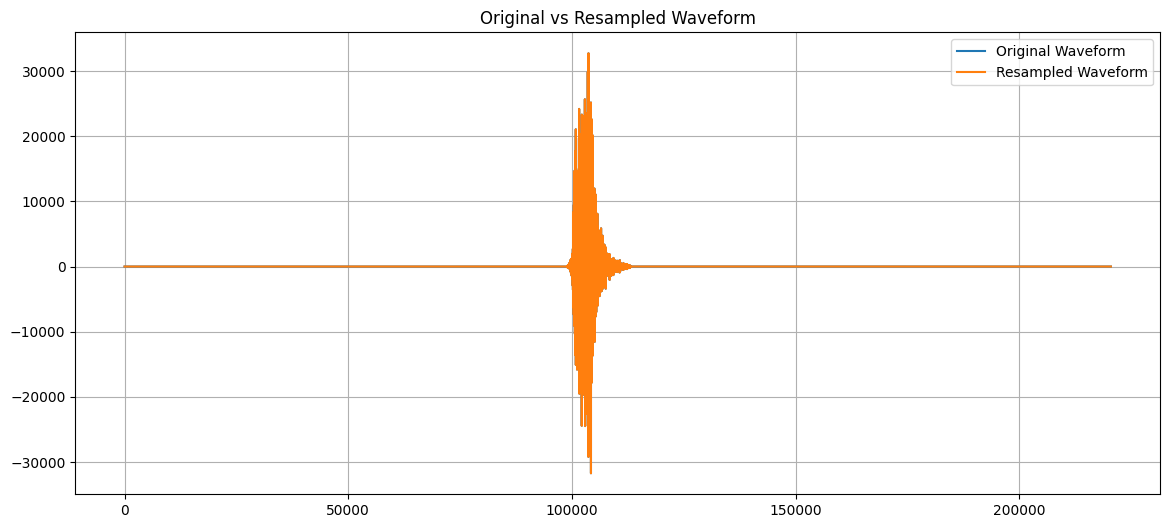

In [22]:
resampled_new_mod_temp = interpolate_array(new_mod_temp)

plt.figure(figsize=(14, 6))
plt.plot(data, label='Original Waveform')
plt.plot(resampled_new_mod_temp, label='Resampled Waveform')
plt.legend()
plt.title('Original vs Resampled Waveform')
plt.grid(True)
plt.show()

## Data Comparison (.wav file accuracy)

In [31]:
from scipy.io.wavfile import write

write('test.wav', 44100, np.int16(resampled_new_mod_temp))

### Download array into file form (.bin, .npy)

In [32]:
np.save('compressed.npy', new_mod2_temp)

In [34]:
binarray = np.array(new_mod2_temp)
binarray.tofile('compressed.bin')

In [27]:
import re

In [28]:
txtfile = open("compressed.txt", "w+")

array_str = re.sub(r'np\.int\d+\((-?\d+)\)', r'\1', str(new_mod2_temp))

array_str = re.sub(r'\s+', '', array_str)

txtfile.write(array_str)
txtfile.close

<function TextIOWrapper.close()>

### From here are dummy files

In [ ]:
# Step 2.1: Leaving the max/min values in between pos/neg peaks to form alternating signs
# Methodology: ++ extract min in between, -- extract max in between, if all zero delete smaller abs end
# Two-pointer method

mod2_temp = []
ptr1 = 0
ptr2 = 0
ptrpos = True

for i in range(len(mod_temp)):
    if mod_temp[i] is not 0 and ptr1 is 0: # Only initial iteration
        if mod_temp[i] < 0:
            ptrpos = False
        ptr1 = i
        ptr2 = i
    # if ptrpos and mod_temp[i] > 0 or not ptrpos and mod_temp[i] < 0:

# Pause for now. Is the logarithm method useful in terms of memory saving?    

In [ ]:
mod_temp

In [60]:
temp.size
diffs.size

881